In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('mushroom_cleaned.csv')

In [4]:
df.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1


In [5]:
# Check the size
df.shape

(54035, 9)

In [6]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
df.nunique()

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64

In [8]:
# Describe the dataset
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [9]:
# Check the null values
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [10]:
# Check the duplicate values
df[df.duplicated(keep=False)]

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
8622,69,6,0,10,1.206059,125,1,0.888450,1
8815,69,6,0,10,1.206059,125,1,0.888450,1
11664,27,6,0,11,1.054858,24,12,0.888450,1
11930,27,6,0,11,1.054858,24,12,0.888450,1
33439,204,0,0,5,0.154755,271,6,0.027372,1
...,...,...,...,...,...,...,...,...,...
52001,249,3,3,2,2.013794,0,2,0.888450,1
52003,285,3,3,2,2.013794,0,2,0.888450,1
52005,268,3,3,2,2.013794,0,2,1.804273,1
52006,238,3,3,2,2.013794,0,2,0.888450,1


In [11]:
# Deledet the duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(53732, 9)

In [13]:
# Check the data is balnced or imbalanced
df['class'].value_counts()

1    29372
0    24360
Name: class, dtype: int64

In [14]:
# From above we can say that the data is not imbalanced

In [15]:
# Get the imp Features
df.corr()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.202713,0.201199,0.183694,0.144586,0.828750,0.115885,0.114201,-0.162830
cap-shape,0.202713,1.000000,0.043001,0.129980,-0.005523,0.220292,0.024224,0.055653,-0.131385
gill-attachment,0.201199,0.043001,1.000000,0.104881,-0.075565,0.246361,0.019674,-0.040929,-0.052397
gill-color,0.183694,0.129980,0.104881,1.000000,0.024556,0.105096,0.179777,0.060660,-0.060166
stem-height,0.144586,-0.005523,-0.075565,0.024556,1.000000,0.114337,0.024320,0.000549,0.175839
stem-width,0.828750,0.220292,0.246361,0.105096,0.114337,1.000000,0.144907,0.040559,-0.177310
stem-color,0.115885,0.024224,0.019674,0.179777,0.024320,0.144907,1.000000,0.010003,-0.119940
season,0.114201,0.055653,-0.040929,0.060660,0.000549,0.040559,0.010003,1.000000,-0.083363
class,-0.162830,-0.131385,-0.052397,-0.060166,0.175839,-0.177310,-0.119940,-0.083363,1.000000


In [16]:
# From the above we can say the cap-diameter and stem-width are the highly correlated

In [17]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df,2))

Top Absolute Correlations
cap-diameter     stem-width    0.828750
gill-attachment  stem-width    0.246361
dtype: float64


# EDA

##### check the class with stem width

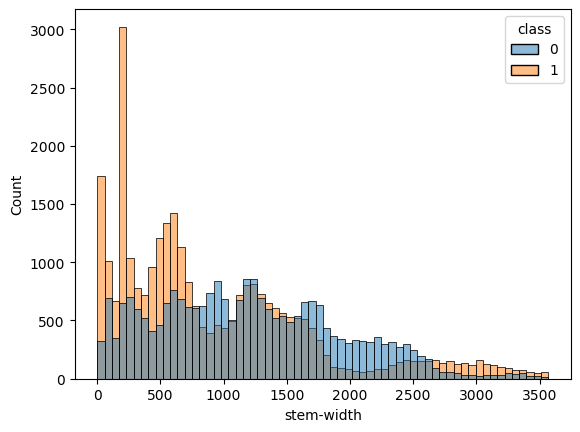

In [18]:
sns.histplot(x='stem-width',data=df,hue='class')
plt.show()

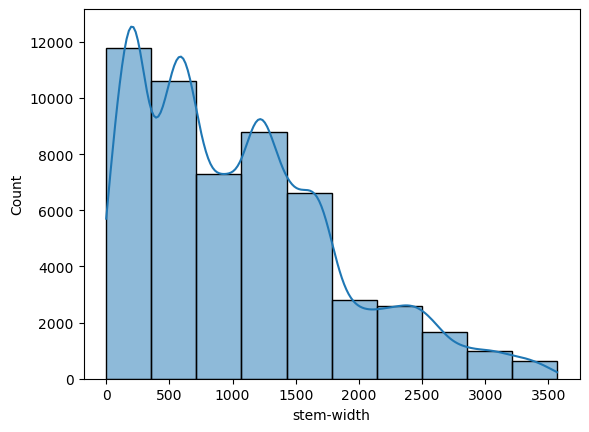

In [19]:
sns.histplot(df['stem-width'],kde=True,bins=10)
plt.show()

##### The distribution is right skewed

In [20]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

##### Class with cap-diameter

In [21]:
df['cap-diameter'].value_counts()

269     90
273     89
104     88
242     85
106     83
        ..
1694     1
1826     1
1766     1
1865     1
1885     1
Name: cap-diameter, Length: 1847, dtype: int64

<AxesSubplot:xlabel='cap-diameter', ylabel='Count'>

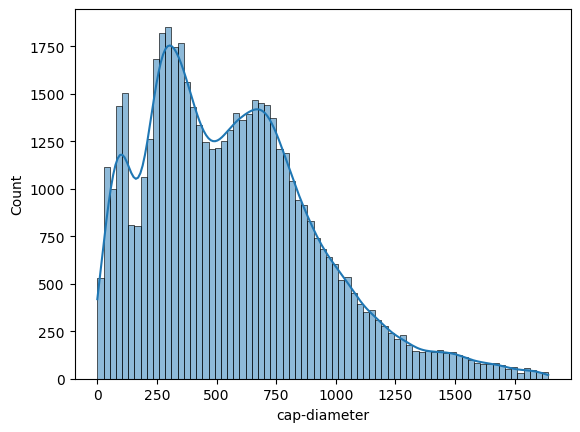

In [22]:
sns.histplot(df['cap-diameter'],kde=True)

##### The data is right skewed

# Check the outliers

In [23]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [24]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

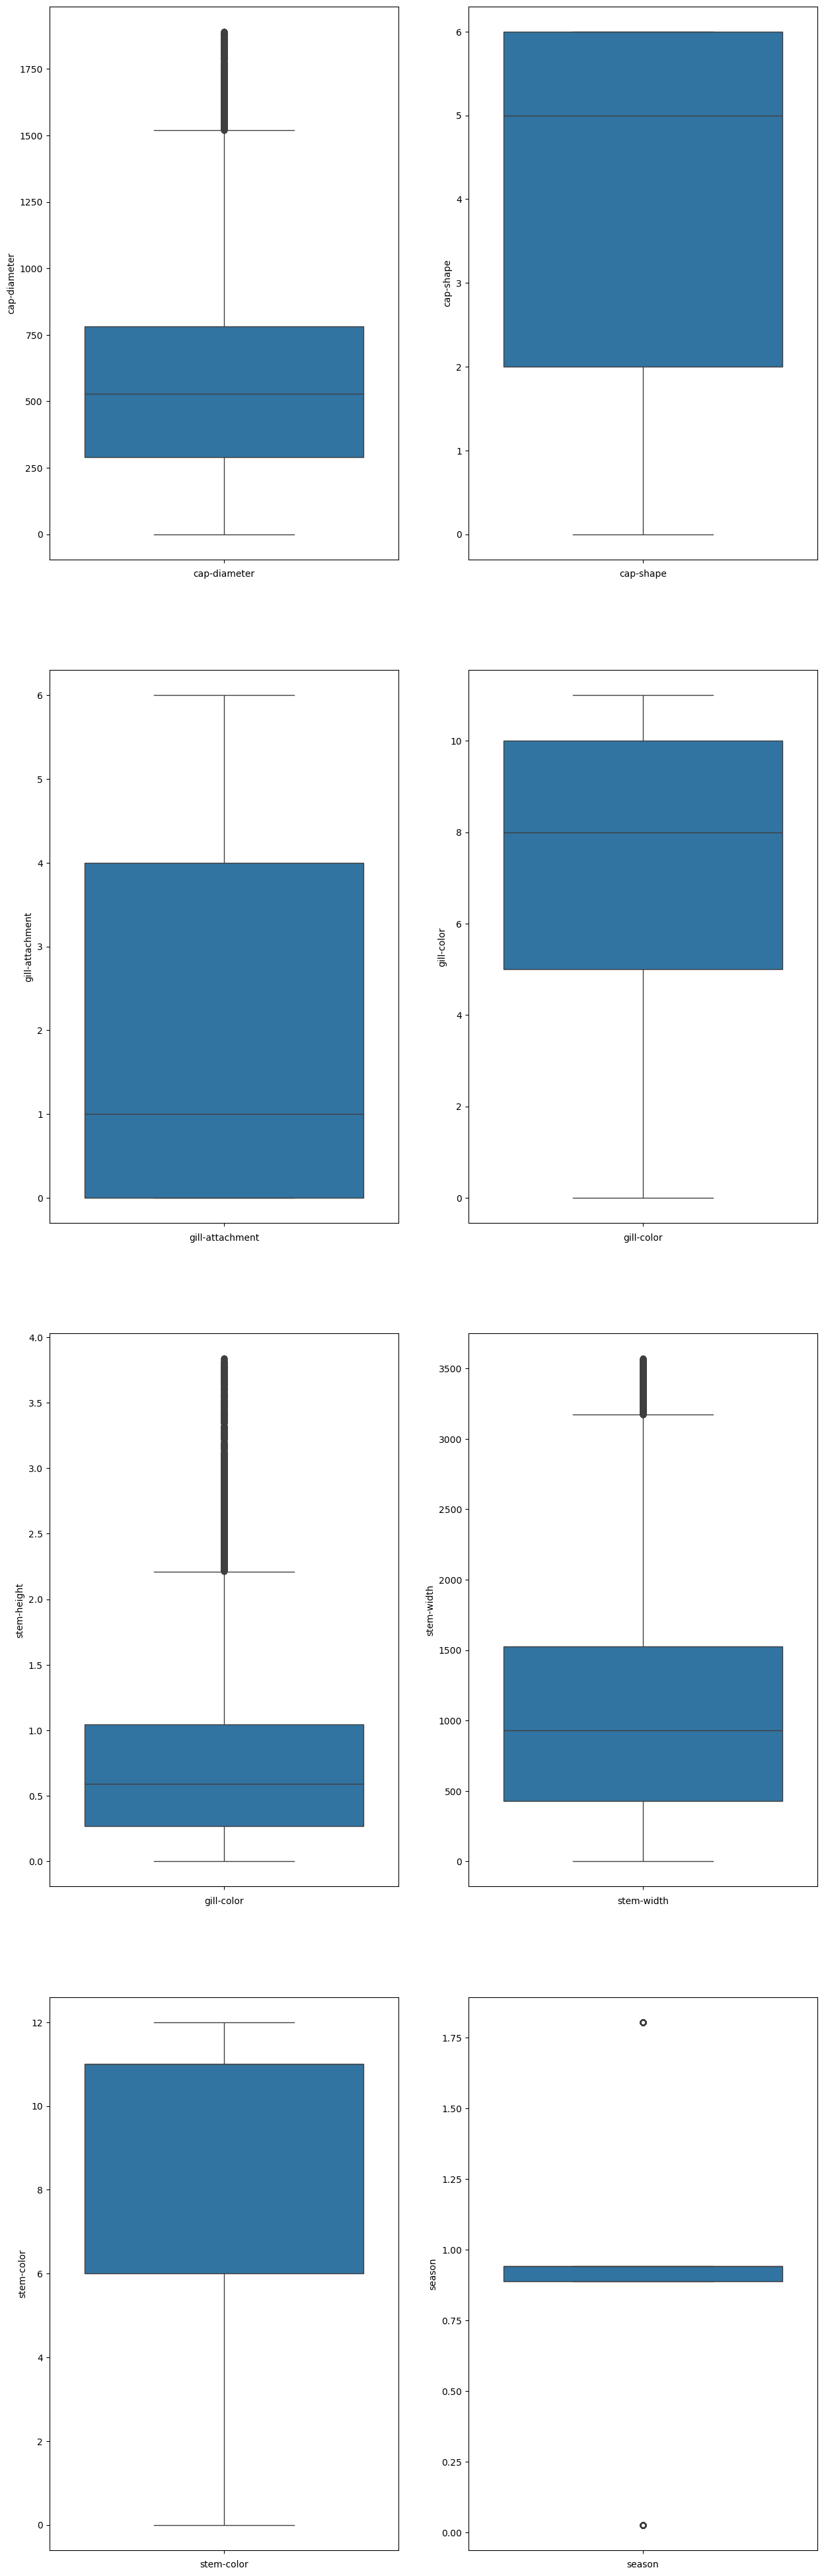

In [25]:
fig,ax=plt.subplots(4,2,figsize=(15,50))
sns.boxplot(df['cap-diameter'],ax=ax[0,0])
ax[0,0].set_xlabel('cap-diameter')
sns.boxplot(df['cap-shape'],ax=ax[0,1])
ax[0,1].set_xlabel('cap-shape')
sns.boxplot(df['gill-attachment'],ax=ax[1,0])
ax[1,0].set_xlabel('gill-attachment')
sns.boxplot(df['gill-color'],ax=ax[1,1])
ax[1,1].set_xlabel('gill-color')
sns.boxplot(df['stem-height'],ax=ax[2,0])
ax[2,0].set_xlabel('gill-color')
sns.boxplot(df['stem-width'],ax=ax[2,1])
ax[2,1].set_xlabel('stem-width')
sns.boxplot(df['stem-color'],ax=ax[3,0])
ax[3,0].set_xlabel('stem-color')
sns.boxplot(df['season'],ax=ax[3,1])
ax[3,1].set_xlabel('season')
plt.show()

##### As per above we can say outliers are present

In [26]:
df.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1


# Pre-processing The data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
Le=StandardScaler()

In [29]:
df_copy=df.copy()

In [30]:
cols=['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']
df[cols]=Le.fit_transform(df[cols])

In [31]:
df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2.229226,-0.926441,-0.063989,0.832305,4.729807,0.625435,0.786897,2.804390,1
1,2.476186,-0.926441,-0.063989,0.832305,4.729807,0.640815,0.786897,2.804390,1
2,2.226451,-0.926441,-0.063989,0.832305,4.427986,0.652349,0.786897,2.804390,1
3,1.921218,0.920991,-0.063989,0.832305,4.699009,0.652349,0.786897,2.804390,1
4,2.043311,0.920991,-0.063989,0.832305,4.581976,0.521623,0.786897,-0.030044,1


# SPlit the dataset

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=df.drop(columns='class')
y=df['class']
X.shape
y.shape

(53732,)

In [34]:
X.shape

(53732, 8)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

# Model Building 

In [36]:
# 1. Logistic regression
# 2. XGBoost
# 3. RandomForest
# 4. KNN
# 5. SVC

In [37]:
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet

In [38]:
lr=LogisticRegression()
ridge=Ridge()
Lasso=Lasso()
enet=ElasticNet()

In [39]:
lr_param={
    "penalty":['l2','l1','elasticnet'],
    "solver":["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
lr_gdr=GridSearchCV(lr,param_grid=lr_param)

In [42]:
lr_gdr.fit(X_train,y_train)

/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [43]:
lr_gdr.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [44]:
lr=LogisticRegression(penalty= 'l2', solver= 'lbfgs')

In [45]:
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
lr.score(X_train,y_train)

0.6335212166329894

In [47]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,r2_score

In [48]:
accuracy_score(y_test,lr.predict(X_test))

0.6351116625310174

In [49]:
print(classification_report(lr.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6648
           1       0.70      0.65      0.68      9472

    accuracy                           0.64     16120
   macro avg       0.63      0.63      0.63     16120
weighted avg       0.64      0.64      0.64     16120



In [50]:
r2_score(lr.predict(X_test),y_test)

-0.5057655523303084

In [51]:
precision_score(lr.predict(X_test),y_test)

0.7040700318326512

In [52]:
result=pd.DataFrame(columns=['model','acc','pr'])

In [53]:
result

,model,acc,pr


In [54]:
r2_score(lr.predict(X_test),y_test)

-0.5057655523303084

In [55]:
ridge.fit(X_train,y_train)

Ridge()

In [56]:
ridge.score(X_train,y_train)

0.09425307948770889

In [57]:
accuracy_score(y_test,ridge.predict(X_test).round())

0.6364143920595533

In [58]:
Lasso.fit(X_train,y_train)

Lasso()

In [59]:
Lasso.score(X_train,y_train)

0.0

In [60]:
accuracy_score(y_test,Lasso.predict(X_test).round())

0.5456575682382134

In [61]:
enet.fit(X_train,y_train)

ElasticNet()

In [62]:
enet.score(X_train,y_train)

0.0

In [63]:
accuracy_score(y_test,enet.predict(X_test).round())

0.5456575682382134

In [64]:
# As per above r2 score we can say that the ridge is better from above all the model
# But its very bad with logistic regression not a good model

In [65]:
%pip install Xgboost

In [66]:
import xgboost as xgb

In [67]:
xgbb=xgb.XGBRFClassifier()

In [68]:
xgbb.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [69]:
xgbb.score(X_train,y_train)

0.8440923109645858

In [70]:
accuracy_score(xgbb.predict(X_test),y_test)

0.8351736972704714

In [71]:
accuracy_score(y_test,xgbb.predict(X_test))

0.8351736972704714

In [72]:
precision_score(xgbb.predict(X_test),y_test)

0.8258299226921327

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc=RandomForestClassifier()

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
rfc.score(X_train,y_train)

1.0

In [77]:
accuracy_score(rfc.predict(X_test),y_test)

0.9902605459057072

In [78]:
precision_score(rfc.predict(X_test),y_test)

0.9914733969986358

In [79]:
result=result.append({'model':'RFC','acc':0.9902605459057072*100,'pr':0.9915870850386539*100,},ignore_index=True)

<ipython-input-79-4637fe899fae>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'RFC','acc':0.9902605459057072*100,'pr':0.9915870850386539*100,},ignore_index=True)


In [80]:
result=result.append({'model':'XGBoost','acc':0.8351736972704714*100,'pr':0.8258299226921327*100,},ignore_index=True)

<ipython-input-80-f1ba90fe7d8b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'XGBoost','acc':0.8351736972704714*100,'pr':0.8258299226921327*100,},ignore_index=True)


In [81]:
result

,model,acc,pr
0,RFC,99.026055,99.158709
1,XGBoost,83.517370,82.582992


In [82]:
print(classification_report(rfc.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7317
           1       0.99      0.99      0.99      8803

    accuracy                           0.99     16120
   macro avg       0.99      0.99      0.99     16120
weighted avg       0.99      0.99      0.99     16120



In [83]:
df.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2.229226,-0.926441,-0.063989,0.832305,4.729807,0.625435,0.786897,2.80439,1
1,2.476186,-0.926441,-0.063989,0.832305,4.729807,0.640815,0.786897,2.80439,1


In [84]:
rfc.predict([[2.2,-0.92,-0.06,0.83,4.7,0.64,0.7,2.8]])

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [85]:
X_test.tail(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
39988,0.236890,-0.002725,-0.959835,-1.048326,3.522524,0.745908,0.786897,-0.030044
47292,0.486626,0.920991,0.831857,1.145744,-0.961671,0.102530,-0.758470,-0.210247


In [86]:
y_test.tail(2)

39988    1
47292    0
Name: class, dtype: int64

In [87]:
rfc.predict([[0.486626,0.920991,0.831857,1.145744,-0.961671,0.102530,-0.758470,-0.210247]])

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [88]:
# Make the pipe line

In [89]:
df.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2.229226,-0.926441,-0.063989,0.832305,4.729807,0.625435,0.786897,2.80439,1
1,2.476186,-0.926441,-0.063989,0.832305,4.729807,0.640815,0.786897,2.80439,1


In [90]:
df_copy.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [92]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [93]:
cols=['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

In [94]:
col_impute=Pipeline(steps=[('imputer',KNNImputer()),
                          ('scale',StandardScaler())
                          ])

In [95]:
col_impute

Pipeline(steps=[('imputer', KNNImputer()), ('scale', StandardScaler())])

In [96]:
Xnew=df_copy.drop(columns='class')

In [97]:
ynew=df_copy['class']

In [98]:
Xnew.shape

(53732, 8)

In [99]:
ynew.shape

(53732,)

In [100]:
from sklearn.pipeline import make_pipeline

In [101]:
Xnew.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273


In [102]:
processing=ColumnTransformer(['allcols',col_impute,cols])

In [103]:
final_pipe=make_pipeline(col_impute,RandomForestClassifier())

In [104]:
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(Xnew,ynew,test_size=0.3,random_state=30)

In [105]:
final_pipe.fit(Xnew_train,ynew_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', KNNImputer()),
                                 ('scale', StandardScaler())])),
                ('randomforestclassifier', RandomForestClassifier())])

In [106]:
y_Pred=final_pipe.predict(Xnew_test)

In [107]:
y_Pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
ynew_test

50212    1
43559    0
7713     0
1395     1
35396    1
        ..
14800    0
24632    1
11132    1
24395    1
19212    0
Name: class, Length: 16120, dtype: int64

In [109]:
Xnew_train

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
752,876,6,0,10,1.706561,1460,11,0.888450
15432,412,2,5,10,0.752455,659,11,0.888450
49085,341,5,3,2,0.389515,687,12,0.943195
17099,423,2,5,10,0.259060,920,6,0.943195
13585,355,6,0,11,0.223249,449,6,1.804273
...,...,...,...,...,...,...,...,...
33270,161,1,0,11,0.687939,246,12,0.888450
44848,999,6,4,1,0.055280,2340,1,0.888450
48048,1555,5,1,11,0.306808,2916,4,0.943195
4517,669,2,5,7,0.251102,1689,10,0.943195


In [110]:
final_pipe.score(Xnew_train,ynew_train)

1.0

In [111]:
accuracy_score(ynew_test,final_pipe.predict(Xnew_test))

0.9888957816377171

# Implement of ANN

In [114]:
from keras.models import Sequential

<class 'ModuleNotFoundError'>: No module named 'keras'

In [122]:
python --version

<class 'NameError'>: name 'python' is not defined